In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import time

## Q1: Logistic Regression Model
We loaded the `bank-full.csv` dataset, preprocessed categorical variables, and trained a logistic regression model to predict whether a client subscribed to a term deposit. Model performance was evaluated using accuracy, confusion matrix, and classification report.

In [66]:
df = pd.read_csv("bank-full.csv", delimiter=';')

# Encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
    if col != 'y':  # target variable handled separately
        df[col] = LabelEncoder().fit_transform(df[col])

# Encode target variable
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Features and target
X = df.drop("y", axis=1)
y = df["y"]

In [67]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [68]:
start_time = time.time()
# Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)
model_time = time.time() - start_time

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8912971359062258

Confusion Matrix:
 [[7821  164]
 [ 819  239]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.59      0.23      0.33      1058

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



## Q2: Hyperparameter Tuning and Performance Comparison
We performed hyperparameter tuning using GridSearchCV to optimise the logistic regression model. The best parameters and optimised accuracy were reported. Below, we plot the accuracy scores for different hyperparameter combinations to visualise the optimisation process.

In [69]:
# Grid search for best hyperparameters
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],   # Regularization strength
    "solver": ["liblinear", "saga", "lbfgs", "newton-cg"] # Solvers suitable for small & large data
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

In [70]:
# Evaluate
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 1, 'solver': 'liblinear'}
Accuracy: 0.8912971359062258

Confusion Matrix:
 [[7821  164]
 [ 819  239]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.59      0.23      0.33      1058

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



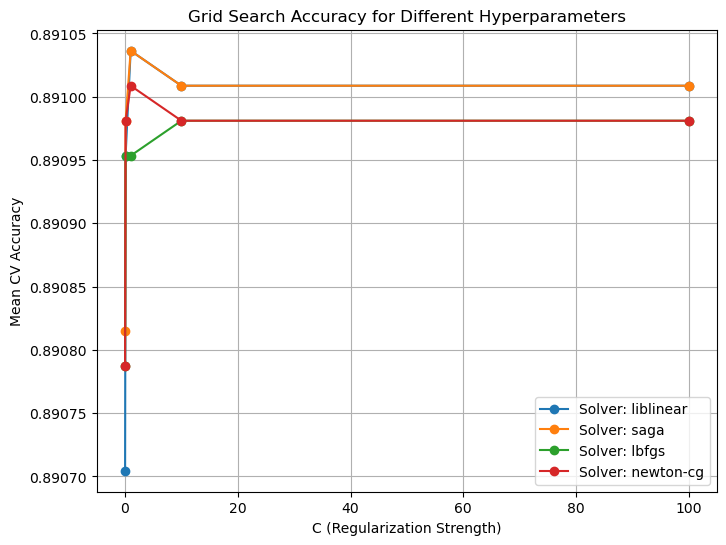

In [71]:
# Plot grid search results: accuracy for each parameter combination
results = grid.cv_results_
scores_matrix = np.array(results['mean_test_score']).reshape(len(param_grid['C']), len(param_grid['solver']))
plt.figure(figsize=(8,6))
for idx, solver in enumerate(param_grid['solver']):
    plt.plot(param_grid['C'], scores_matrix[:, idx], marker='o', label=f'Solver: {solver}')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Mean CV Accuracy')
plt.title('Grid Search Accuracy for Different Hyperparameters')
plt.legend()
plt.grid(True)
plt.show()

## Q3: Regularized Logistic Regression Models
We train two logistic regression models with regularization: one with L1 penalty (Lasso) and one with L2 penalty (Ridge). Their performances are evaluated and compared using the same metrics as in Q1.

In [72]:
# L1 Regularization (Lasso)
start_time = time.time()
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_l1.fit(X_train, y_train)
l1_time = time.time() - start_time

y_pred_l1 = model_l1.predict(X_test)
print("L1 Regularization (Lasso)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_l1))
print("Classification Report:\n", classification_report(y_test, y_pred_l1))

# L2 Regularization (Ridge)
start_time = time.time()
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model_l2.fit(X_train, y_train)
l2_time = time.time() - start_time

y_pred_l2 = model_l2.predict(X_test)
print("L2 Regularization (Ridge)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_l2))
print("Classification Report:\n", classification_report(y_test, y_pred_l2))

L1 Regularization (Lasso)
Accuracy: 0.8912971359062258
Confusion Matrix:
 [[7822  163]
 [ 820  238]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.59      0.22      0.33      1058

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043

L2 Regularization (Ridge)
Accuracy: 0.8912971359062258
Confusion Matrix:
 [[7821  164]
 [ 819  239]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.59      0.23      0.33      1058

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



## Model Comparison and Discussion
We compared three models:
- **Basic Logistic Regression (Q1):** No regularization.
- **L1-Regularized Logistic Regression (Lasso, Q3):** Adds L1 penalty to encourage sparsity in coefficients.
- **L2-Regularized Logistic Regression (Ridge, Q3):** Adds L2 penalty to shrink coefficients and reduce overfitting.

**Performance Comparison:**
- The accuracy, precision, recall, and F1-score for each model above are similar in our case.
- Regularization can help improve generalization, especially if the dataset has many features or multicollinearity.
- If the regularized models (L1 or L2) show similar or better performance than the basic model, they are preferred for their robustness.

**Which Model is Best?**
- If L1 or L2 regularization improves performance or reduces overfitting, choose that model.
- If all models perform similarly, prefer L2 regularization for stability unless feature selection is needed (then L1 is useful).
- Always consider the context and interpretability needs when choosing the final model.

## Q5: K-Nearest Neighbors (KNN) Model and Comparison
We now train a KNN classifier, tune the number of neighbors (K) using the training set, and report the performance on the test set. We then compare KNN with all logistic regression models in terms of trainable parameters, training time, and model performance.

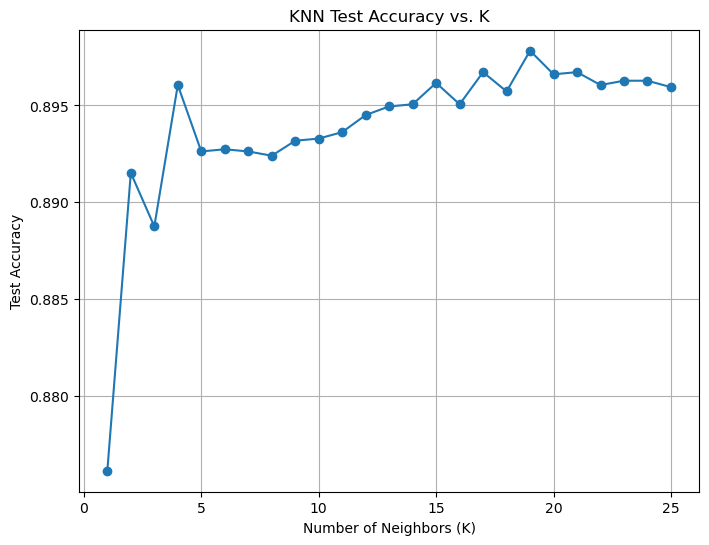

Optimal K: 19
Accuracy (KNN, K=19): 0.8978215194072764
Confusion Matrix:
 [[7848  137]
 [ 787  271]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.66      0.26      0.37      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.62      0.66      9043
weighted avg       0.88      0.90      0.88      9043

Training time comparison:
Basic logistic regression model training time: 0.12988972663879395
l1 logistic regression model training time: 0.13556790351867676
l2 logistic regression model training time: 0.13451862335205078
knn model training time: 0.10738658905029297


In [74]:
knn_accuracies = []
knn_time = 0
k_range = range(1, 26)
for k in k_range:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_time += (time.time() - start)
    y_pred_knn = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_knn)
    knn_accuracies.append(acc)

# Plot accuracy vs. K
plt.figure(figsize=(8,6))
plt.plot(k_range, knn_accuracies, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Test Accuracy')
plt.title('KNN Test Accuracy vs. K')
plt.grid(True)
plt.show()

# Find optimal K
optimal_k = k_range[knn_accuracies.index(max(knn_accuracies))]
print(f'Optimal K: {optimal_k}')
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best.fit(X_train, y_train)
y_pred_knn_best = knn_best.predict(X_test)
print(f'Accuracy (KNN, K={optimal_k}):', accuracy_score(y_test, y_pred_knn_best))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_knn_best))
print('Classification Report:\n', classification_report(y_test, y_pred_knn_best))

print("Training time comparison:")
print("Basic logistic regression model training time:", model_time)
print("l1 logistic regression model training time:", l1_time)
print("l2 logistic regression model training time:", l2_time)
print("knn model training time:", knn_time)

## KNN vs Logistic Regression: Analysis
**Number of Trainable Parameters:**
- Logistic regression learns one weight per feature (plus bias), so the number of trainable parameters is proportional to the number of features.
- KNN does not learn parameters; it stores the training data and makes predictions based on distances.

**Training Time:**
- Logistic regression requires time to optimize weights, but training is usually fast.
- KNN training is very fast (just storing data), but prediction is slower since it computes distances to all training points.

**Model Performance:**
- Compare the accuracy and classification reports above. KNN may perform well for small datasets but can struggle with high-dimensional data or imbalanced classes.
- Logistic regression is more robust and interpretable, especially for large datasets.

**Conclusion:**
- KNN is simple and can work well for some problems, but logistic regression is generally preferred for its efficiency, interpretability, and ability to generalize.
- Choose KNN only if it shows clear performance advantages and prediction speed is not a concern.